<h1>Data Mining - Case Study</h1>

_Link to the Dataset_ : https://www.kaggle.com/johndasilva/diabetes <br><br>

**Context** <br>

Explore the relationship between the various parameters causing diabetes and try mining some interesting patterns. Dataset of diabetes, taken from the hospital Frankfurt, Germany.<br><br>


**Data dictionary**<br>

***Pregnancies*** = Number of times pregnant<br>

***Glucose*** = Plasma glucose concentration a 2 hours in an oral glucose tolerance test<br>

***BloodPressure*** = Diastolic blood pressure (mm Hg)<br>

***SkinThickness*** = Triceps skin fold thickness (mm)<br>

***Insulin*** = 2-Hour serum insulin (mu U/ml)<br>

***BMI*** = Body mass index (weight in kg/(height in m)^2) <br>

***DiabetesPedigreeFunction*** = Diabetes pedigree function<br>

***Age*** = Age in years<br>

***Outcome*** = Class variable (1: if diabetic, 0: if non-diabetic)

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline

In [69]:
df = pd.read_csv('datasets/2diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0
7,8,194,80,0,0,26.1,0.551,67,0
8,2,83,65,28,66,36.8,0.629,24,0
9,2,89,90,30,0,33.5,0.292,42,0


In [70]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

**Handling '0' values**

In [71]:
df['Glucose'] = df['Glucose'].replace(0,np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0,np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0,np.nan)
df['Insulin'] = df['Insulin'].replace(0,np.nan)
df['BMI'] = df['BMI'].replace(0,np.nan)
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].replace(0,np.nan)
df['Age'] = df['Age'].replace(0,np.nan)
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.0,35.0,NaN,33.6,0.127,47,1
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0
2,0,145.0,NaN,NaN,NaN,44.2,0.630,31,1
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.0,41.0,480.0,40.7,0.536,21,0
5,0,173.0,78.0,32.0,265.0,46.5,1.159,58,0
6,4,99.0,72.0,17.0,NaN,25.6,0.294,28,0
7,8,194.0,80.0,NaN,NaN,26.1,0.551,67,0
8,2,83.0,65.0,28.0,66.0,36.8,0.629,24,0
9,2,89.0,90.0,30.0,NaN,33.5,0.292,42,0


In [72]:
df.isna().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

# Exploratory Data Analysis

**Getting basic info of data**

In [73]:
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [74]:
df.describe()
df.describe().to_csv("Dataset_description.csv")

## Univariate Analysis

In [75]:
sns.set(style='white',  palette='deep', font_scale=0.75)

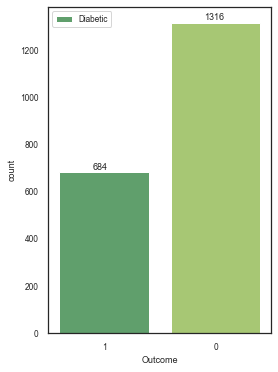

In [76]:
plt.figure(figsize=(4,6))
ax = sns.countplot(df['Outcome'],palette='summer',order=[1,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()+0.3,p.get_height() * 1.01))
plt.legend(['Diabetic'])  
plt.savefig('Total-diabetic-count-barchart.png')

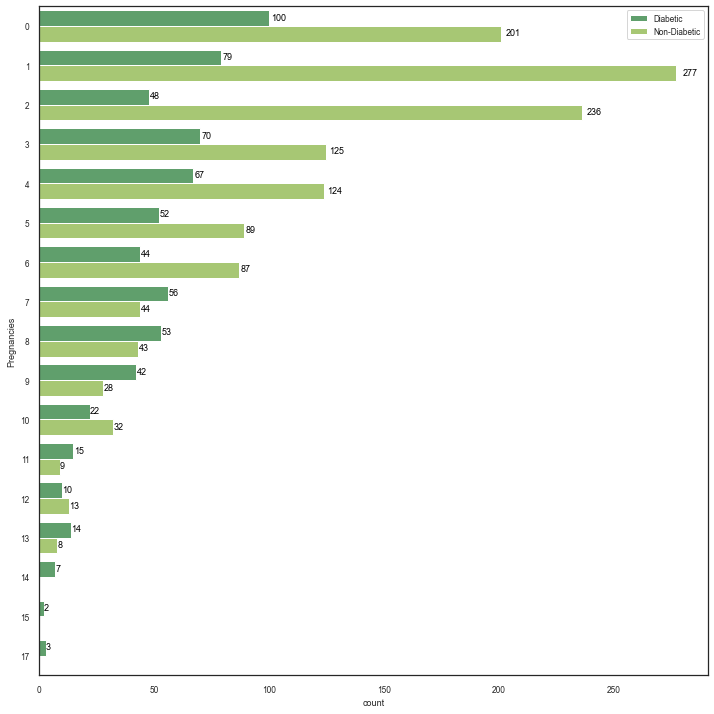

In [77]:
plt.figure(figsize=(10,10))
ax1 = sns.countplot(y=df['Pregnancies'],hue=df['Outcome'],hue_order=[1,0],palette='summer')
for p in ax1.patches:
    ax1.annotate(format(p.get_width(), '.0f'),(1.01*p.get_width(),p.get_y()+0.6 * p.get_height()),color='black')
plt.legend(['Diabetic','Non-Diabetic'])  
plt.tight_layout()
plt.savefig('Pregnancy-Outcomes-Barplot.png')

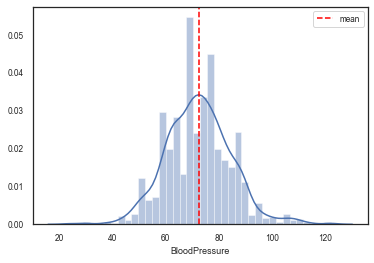

In [78]:
sns.distplot(df['BloodPressure'])
plt.axvline(x=np.mean(df['BloodPressure']),c='red',ls='--',label='mean')
plt.legend()

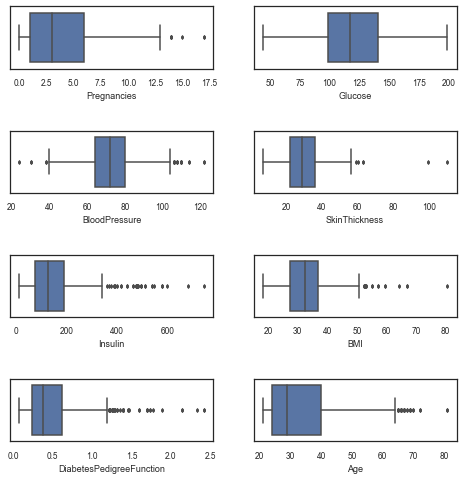

In [79]:
plt.figure(figsize=(8,8))
plt.subplots_adjust(hspace = 1)
plt.subplot(4,2,1)
sns.boxplot(df.Pregnancies,fliersize = 2.5)
plt.subplot(4,2,2)
sns.boxplot(df.Glucose,fliersize = 2.5)
plt.subplot(4,2,3)
sns.boxplot(df.BloodPressure,fliersize = 2.5)
plt.subplot(4,2,4)
sns.boxplot(df.SkinThickness,fliersize = 2.5)
plt.subplot(4,2,5)
sns.boxplot(df.Insulin,fliersize = 2.5)
plt.subplot(4,2,6)
sns.boxplot(df.BMI,fliersize = 2.5)
plt.subplot(4,2,7)
sns.boxplot(df.DiabetesPedigreeFunction,fliersize = 2.5)
plt.subplot(4,2,8)
sns.boxplot(df.Age,fliersize = 2.5)
plt.savefig('boxplotsAll.png')

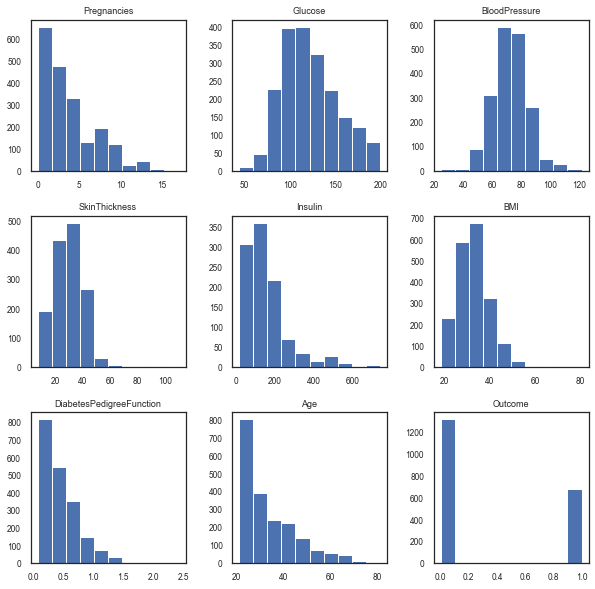

In [80]:
df.hist(grid= False,figsize=(10,10))
plt.savefig('allHistograms.png')

### Bivariate Analysis

In [81]:
sns.set(style='darkgrid',  font_scale=0.75)

<Figure size 1440x1440 with 0 Axes>

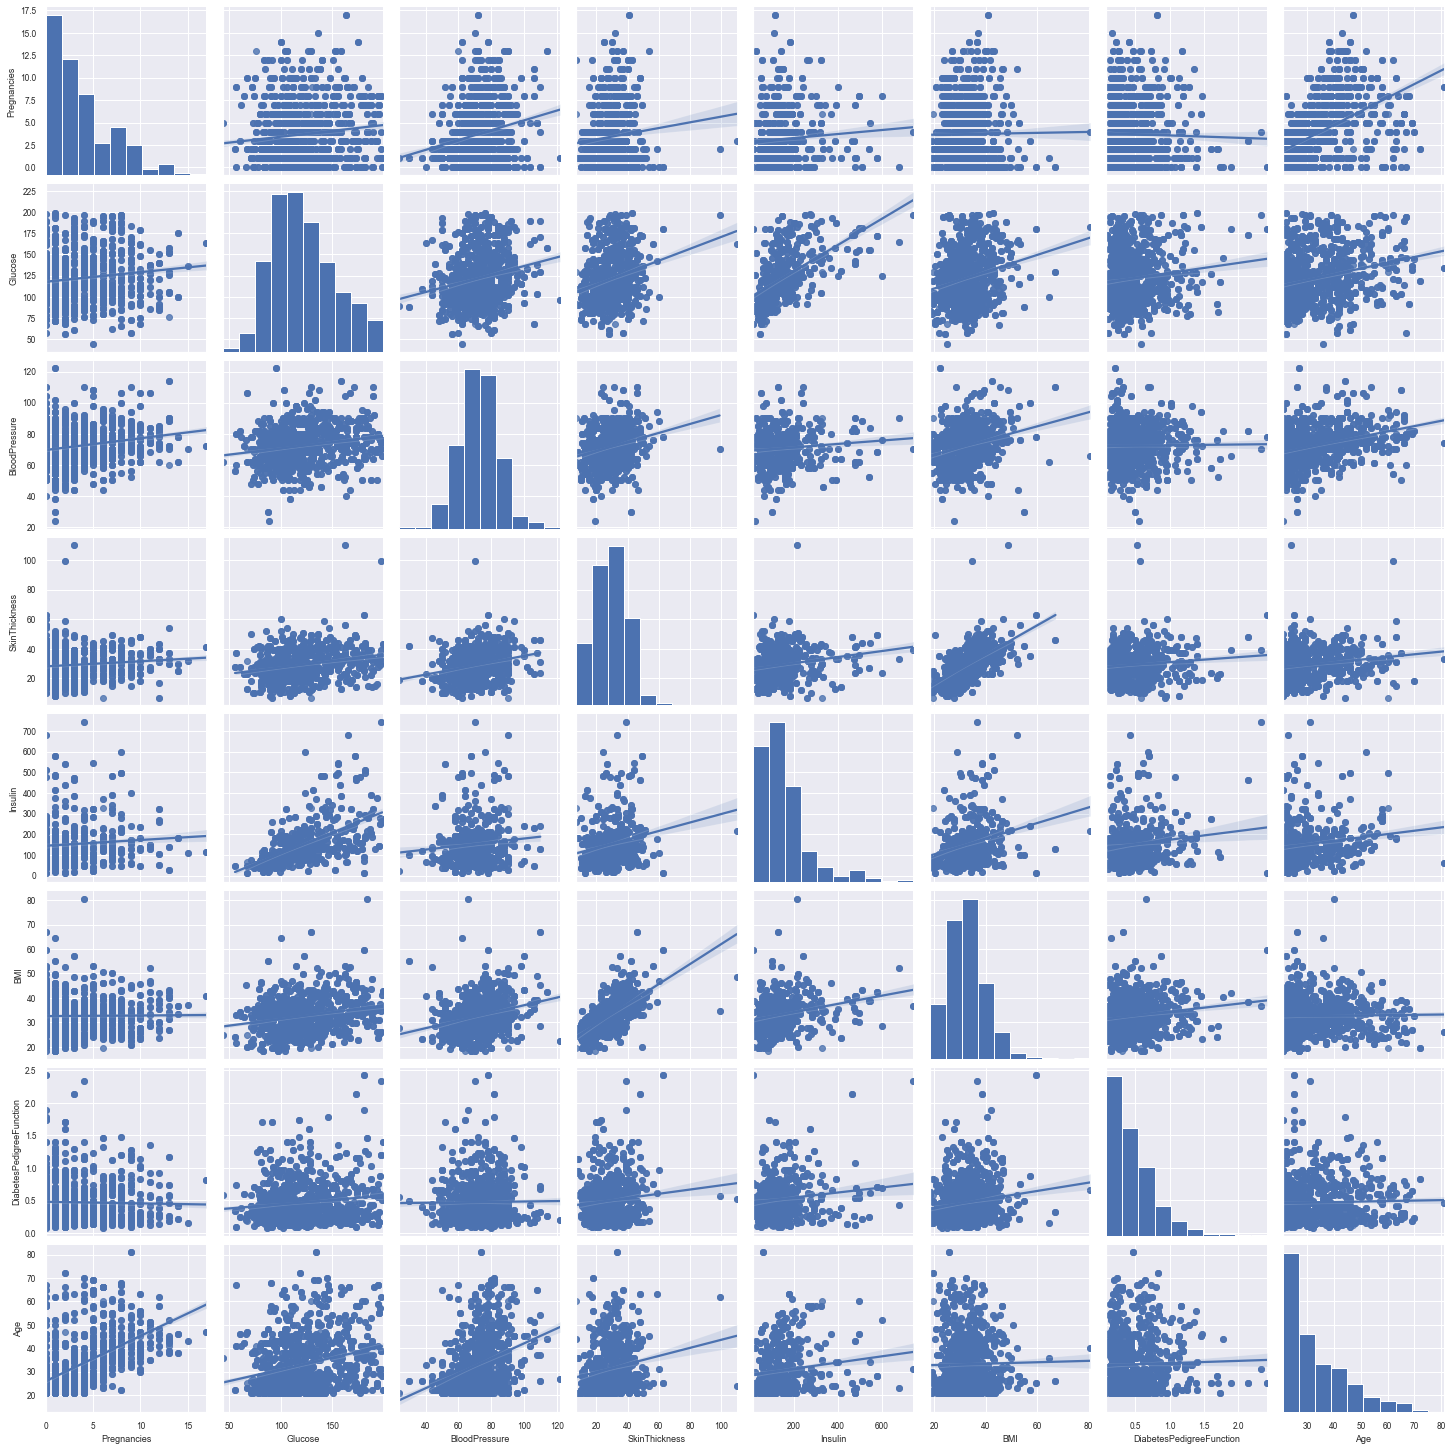

In [82]:
plt.figure(figsize=(20,20))
sns.pairplot(data=df,kind='reg',vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
plt.savefig('AllFeatureRelationPairPlot.png')

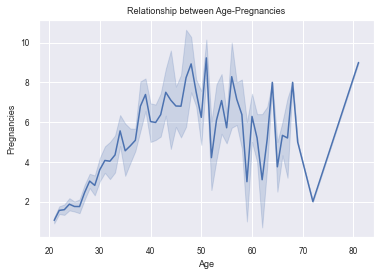

In [83]:
sns.lineplot(df['Age'],df['Pregnancies'])
plt.title('Relationship between Age-Pregnancies')
plt.savefig('Age-Pregnancies-Relation.png')

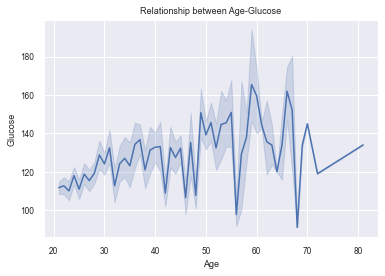

In [84]:
sns.lineplot(df['Age'],df['Glucose'])
plt.title('Relationship between Age-Glucose')
plt.savefig('Age-Glucose-Relation.png')

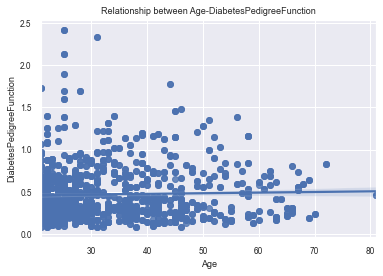

In [85]:
sns.regplot(df['Age'],df['DiabetesPedigreeFunction'])
plt.title('Relationship between Age-DiabetesPedigreeFunction')
plt.savefig('Age-DiabetesPedigreeFunc-Relation.png')

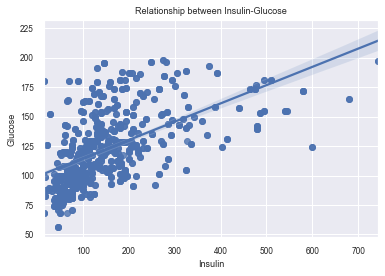

In [86]:
sns.regplot(df['Insulin'],df['Glucose'])
plt.title('Relationship between Insulin-Glucose')
plt.savefig('Insulin-Glucose-Relation.png')

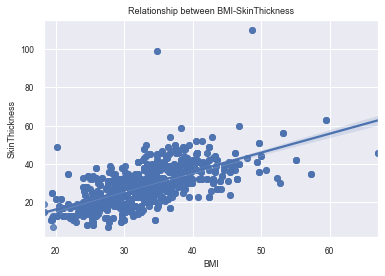

In [87]:
sns.regplot(df['BMI'],df['SkinThickness'])
plt.title('Relationship between BMI-SkinThickness')
plt.savefig('BMI-SkinThickness-Relation.png')

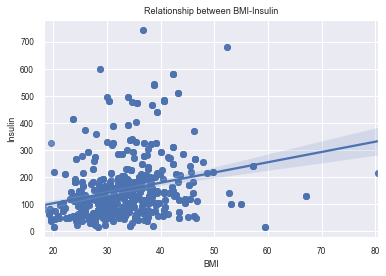

In [88]:
sns.regplot(df['BMI'],df['Insulin'])
plt.title('Relationship between BMI-Insulin')
plt.savefig('BMI-Insulin-Relation.png')

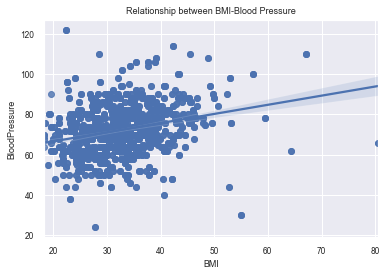

In [89]:
sns.regplot(df['BMI'],df['BloodPressure'])
plt.title('Relationship between BMI-Blood Pressure')
plt.savefig('BMI-BloodPressure-Relation.png')

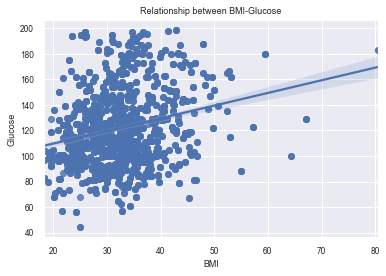

In [90]:
sns.regplot(df['BMI'],df['Glucose'])
plt.title('Relationship between BMI-Glucose')
plt.savefig('BMI-Glucose-Relation.png')

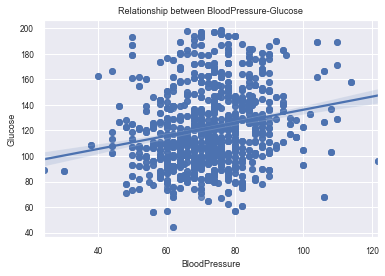

In [91]:
sns.regplot(df['BloodPressure'],df['Glucose'])
plt.title('Relationship between BloodPressure-Glucose')
plt.savefig('BloodPressure-Glucose-Relation.png')

In [92]:
outcome_grouping = df.groupby('Outcome').mean()
outcome_grouping

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.168693,111.177998,70.840316,27.488542,131.346535,31.159411,0.434676,31.081307
1,4.732456,142.821534,75.469767,33.149893,200.729970,35.476065,0.540681,36.956140


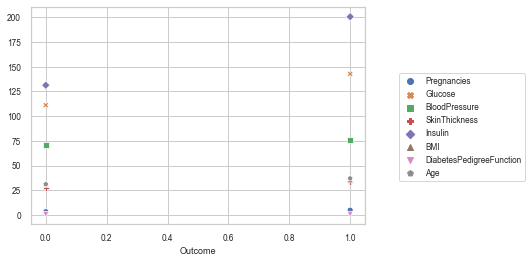

In [93]:
sns.set_style('whitegrid')
sns.scatterplot(data = outcome_grouping,size=1)
plt.legend(loc=(1.1,0.2))
plt.savefig('Outcomes_mean.png')

# Handling Missing values

In [94]:
df.isna().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [95]:
df.isna().sum()/len(df) *100

Pregnancies                  0.00
Glucose                      0.65
BloodPressure                4.50
SkinThickness               28.65
Insulin                     47.80
BMI                          1.40
DiabetesPedigreeFunction     0.00
Age                          0.00
Outcome                      0.00
dtype: float64

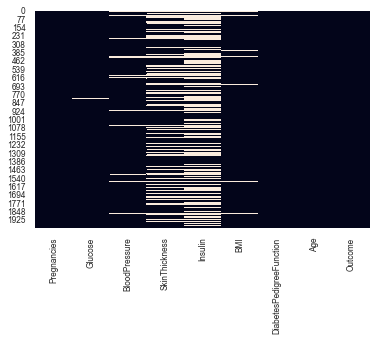

In [96]:
sns.heatmap(df.isnull(),cbar=False)
plt.savefig('Heatmap-before-NaN.png')

In [97]:
df.fillna(df.mean(),inplace= True)

In [98]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

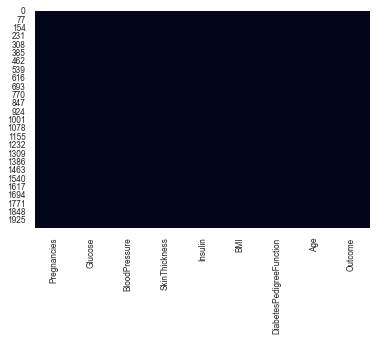

In [99]:
sns.heatmap(df.isnull(),cbar=False)
plt.savefig('Heatmap-After-NaN.png')

### Correlation Analysis

In [100]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.121537,0.197878,0.087605,0.054230,0.011288,-0.025453,0.539457,0.224437
Glucose,0.121537,1.000000,0.199323,0.208309,0.406556,0.232654,0.124141,0.259805,0.488020
BloodPressure,0.197878,0.199323,1.000000,0.202983,0.073310,0.259240,0.012074,0.323335,0.174481
SkinThickness,0.087605,0.208309,0.202983,1.000000,0.179486,0.517663,0.091822,0.133270,0.205527
Insulin,0.054230,0.406556,0.073310,0.179486,1.000000,0.187411,0.096155,0.089810,0.207696
BMI,0.011288,0.232654,0.259240,0.517663,0.187411,1.000000,0.142016,0.018455,0.282182
DiabetesPedigreeFunction,-0.025453,0.124141,0.012074,0.091822,0.096155,0.142016,1.000000,0.026569,0.155459
Age,0.539457,0.259805,0.323335,0.133270,0.089810,0.018455,0.026569,1.000000,0.236509
Outcome,0.224437,0.488020,0.174481,0.205527,0.207696,0.282182,0.155459,0.236509,1.000000


In [101]:
np.round(df.corr(),2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.12,0.20,0.09,0.05,0.01,-0.03,0.54,0.22
Glucose,0.12,1.00,0.20,0.21,0.41,0.23,0.12,0.26,0.49
BloodPressure,0.20,0.20,1.00,0.20,0.07,0.26,0.01,0.32,0.17
SkinThickness,0.09,0.21,0.20,1.00,0.18,0.52,0.09,0.13,0.21
Insulin,0.05,0.41,0.07,0.18,1.00,0.19,0.10,0.09,0.21
BMI,0.01,0.23,0.26,0.52,0.19,1.00,0.14,0.02,0.28
DiabetesPedigreeFunction,-0.03,0.12,0.01,0.09,0.10,0.14,1.00,0.03,0.16
Age,0.54,0.26,0.32,0.13,0.09,0.02,0.03,1.00,0.24
Outcome,0.22,0.49,0.17,0.21,0.21,0.28,0.16,0.24,1.00


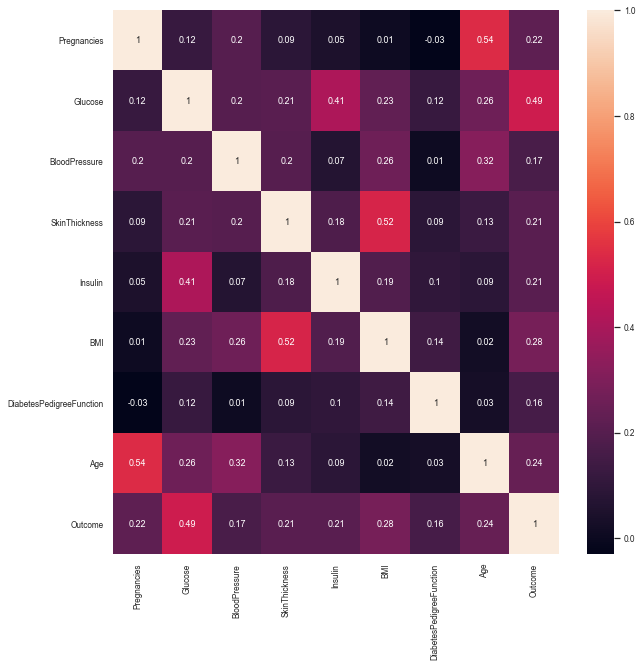

In [104]:
plt.figure(figsize=(10,10))
sns.heatmap(np.round(df.corr(),2),annot = True)
plt.savefig('Correlation.png')

# Profiling the dataset

In [105]:
prof = ProfileReport(df)
prof.to_file("output.html")

# Balancing the dataset - SMOTE oversampling technique

In [106]:
import sklearn
import scipy

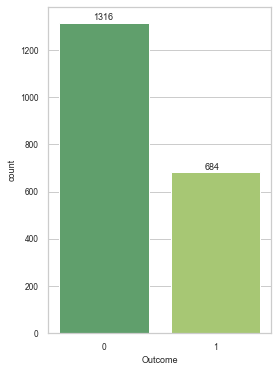

In [107]:
plt.figure(figsize=(4,6))
ax = sns.countplot(df['Outcome'],palette='summer',order=[0,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()+0.3,p.get_height() * 1.01))

In [109]:
print(str(df['Outcome'].value_counts()[0]/df.shape[0] * 100) + " : " + str(df['Outcome'].value_counts()[1]/df.shape[0] * 100))

65.8 : 34.2


Imbalanced dataset. Class '0' data distribution is nearly twice that of Class '1'. We can oversample the class 1 data.

In [110]:
diabetic = df[df['Outcome']==1]
non_diabetic = df[df['Outcome']==0]

In [111]:
print(diabetic.shape,non_diabetic.shape)

(684, 9) (1316, 9)


In [112]:
X  = df.iloc[:,:-1]
X.shape

(2000, 8)

In [113]:
Y = df.iloc[:,-1]
Y.shape

(2000,)

In [118]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 40)
X_res,y_res=smk.fit_sample(X,Y)
X_res.shape,y_res.shape

((2632, 8), (2632,))

In [119]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 1316, 1: 684})
Resampled dataset shape Counter({1: 1316, 0: 1316})


In [121]:
result = pd.concat([X_res, y_res], axis=1, sort=False)
result

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.000000,62.000000,35.000000,153.743295,33.600000,0.127000,47,1
1,0,84.000000,82.000000,31.000000,125.000000,38.200000,0.233000,23,0
2,0,145.000000,72.403665,29.341275,153.743295,44.200000,0.630000,31,1
3,0,135.000000,68.000000,42.000000,250.000000,42.300000,0.365000,24,1
4,1,139.000000,62.000000,41.000000,480.000000,40.700000,0.536000,21,0
...,...,...,...,...,...,...,...,...,...
2627,0,198.000000,66.000000,32.000000,274.000000,41.300000,0.502000,28,1
2628,12,158.217216,113.456960,29.341275,153.743295,42.050201,0.251244,44,1
2629,1,127.311939,48.458707,43.853232,187.807454,38.848654,0.693044,24,1
2630,1,112.624590,75.249179,29.588567,153.743295,32.661802,0.247592,23,1


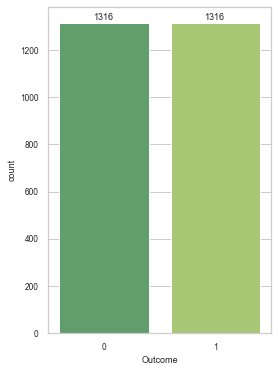

In [122]:
plt.figure(figsize=(4,6))
ax = sns.countplot(result['Outcome'],palette='summer',order=[0,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()+0.3,p.get_height() * 1.01))

In [123]:
outcome_grouping_balanced = result.groupby('Outcome').mean()
outcome_grouping_balanced

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.168693,111.235431,70.900902,27.989737,141.710993,31.187730,0.434676,31.081307
1,4.622340,141.696360,74.946642,32.072163,175.732986,35.123822,0.528955,36.570669


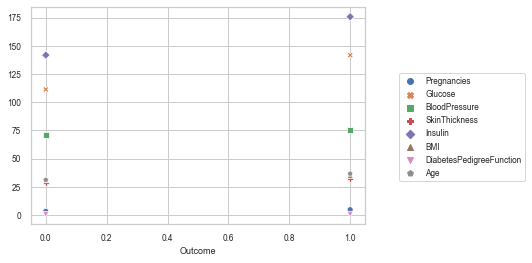

In [124]:
sns.set_style('whitegrid')
sns.scatterplot(data = outcome_grouping_balanced,size=1)
plt.legend(loc=(1.1,0.2))
plt.savefig('Balanced_Outcomes_mean.png')